In [4]:
from google.colab import drive
drive.mount( "/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('drive/MyDrive/data/rating.csv')
news_df = pd.read_csv('drive/MyDrive/data/raw_data/data.csv')
traffic_df = pd.read_csv('drive/MyDrive/data/traffic_data/traffic.csv')
domains_location = pd.read_csv('drive/MyDrive/data/domains_location.csv')

In [9]:
# Merge datasets based on common keys
merged_data = pd.merge(news_df, domains_location, left_on="source_name", right_on="SourceCommonName", how="left")
merged_data = pd.merge(merged_data, traffic_df, left_on="source_name", right_on="Domain", how="left")

In [11]:
top_10_articles_count = merged_data.groupby('source_name').size().nlargest(10)
bottom_10_articles_count = merged_data.groupby('source_name').size().nsmallest(10)

print('Top 10 websites:', top_10_articles_count)
print('Bottom 10 websites:', bottom_10_articles_count)

Top 10 websites: source_name
ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
dtype: int64
Bottom 10 websites: source_name
1000wordphilosophy.com    1
148apps.com               1
1a3orn.com                1
2000ad.com                1
2dopeboyz.com             1
2paxfly.com               1
3dnchu.com                1
3quarksdaily.com          1
43rumors.com              1
71toes.com                1
dtype: int64


In [12]:
top_10_traffic = merged_data.groupby('source_name')['GlobalRank'].mean().nlargest(10)
print('Websites with the highest traffic:', top_10_traffic)

Websites with the highest traffic: source_name
9to5chic.com              662946.0
1000wordphilosophy.com    446304.0
2000ad.com                279008.0
43rumors.com              205937.0
pitpass.com               171990.0
2dopeboyz.com             143915.0
2chblog.jp                134659.0
8thlight.com               82691.0
tomandlorenzo.com          76402.0
3quarksdaily.com           53975.0
Name: GlobalRank, dtype: float64


In [14]:
countries_media_orgs = domains_location['Country'].value_counts().nlargest(10)
print('Countries with the highest number of media orgs:', countries_media_orgs)

Countries with the highest number of media orgs: Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64


In [15]:
countries_articles = merged_data['Country'].value_counts().nlargest(10)
print('Countries with Many Articles Written About Them:', countries_articles)

Countries with Many Articles Written About Them: Country
United States    321
Russia            31
Australia          4
France             4
Name: count, dtype: int64


In [17]:
specific_continent = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']
websites_reporting = merged_data[merged_data['Country'].isin(specific_continent)]['source_name'].value_counts()
print('Websites that reported continents:', websites_reporting)

Websites that reported continents: source_name
3dnews.ru    31
Name: count, dtype: int64


In [19]:
print(merged_data.head())

   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   

                         

In [ ]:
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [ ]:
df.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [ ]:
df['category'].unique()

array(['Monaco', 'Madagascar', 'Mexico', 'Maldives', 'Mali', 'Barbados',
       'Nicaragua', 'Congo, The Democratic Republic of the',
       'North Macedonia', 'Malta', 'Poland', 'Myanmar',
       'Russian Federation', 'Mongolia', 'Montenegro', 'Malaysia',
       'Romania', 'Mozambique', 'Montserrat', 'South Sudan', 'News',
       'Israel', 'Mauritania', 'Mauritius', 'Netherlands', 'Martinique',
       'Malawi', 'Germany', 'Niger', 'Namibia', 'Nigeria', 'Georgia',
       'Nepal', 'Facebook', 'Norway', 'COVID', 'Peru', 'Travel',
       'History', 'Papua New Guinea', 'New Zealand', 'Sports', 'Oman',
       'Pakistan', 'Panama', 'Love', 'America', 'Philippines', 'Palau',
       'Politics', 'Armenia', 'Food', 'Sudan', 'Puerto Rico', 'Weather',
       'Real estate', 'Cars', 'Senegal', 'Singapore', 'Stock', 'Ghana',
       'TikTok', 'Photography', 'Kazakhstan', 'Games', 'Climate', 'Space',
       'Somalia', 'Tonga', 'Architecture', 'Art', 'Africa',
       'Relationships', 'Qatar', 'world', '

In [ ]:
df['category'].value_counts()

category
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
               ... 
Burundi           3
Cabo Verde        3
Honduras          3
Martinique        2
Réunion           2
Name: count, Length: 256, dtype: int64

In [ ]:
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['content_length'] = df['content'].apply(lambda x: len(str(x)))

In [ ]:
df['title_length'].describe()

count    58356.000000
mean        76.767033
std         26.009651
min         12.000000
25%         60.000000
50%         73.000000
75%         89.000000
max        326.000000
Name: title_length, dtype: float64

In [ ]:
df['content_length'].describe()

count    58356.000000
mean       207.838920
std         28.566682
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

In [ ]:
df['title_sentiment'].describe()

count       58356
unique          3
top       Neutral
freq        42926
Name: title_sentiment, dtype: object

In [ ]:
df['title_sentiment'].value_counts()

title_sentiment
Neutral     42926
Negative     9133
Positive     6297
Name: count, dtype: int64

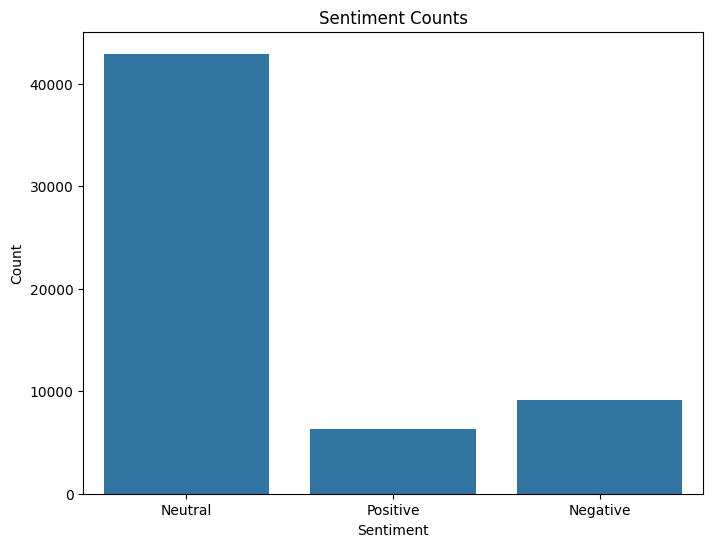

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='title_sentiment')
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

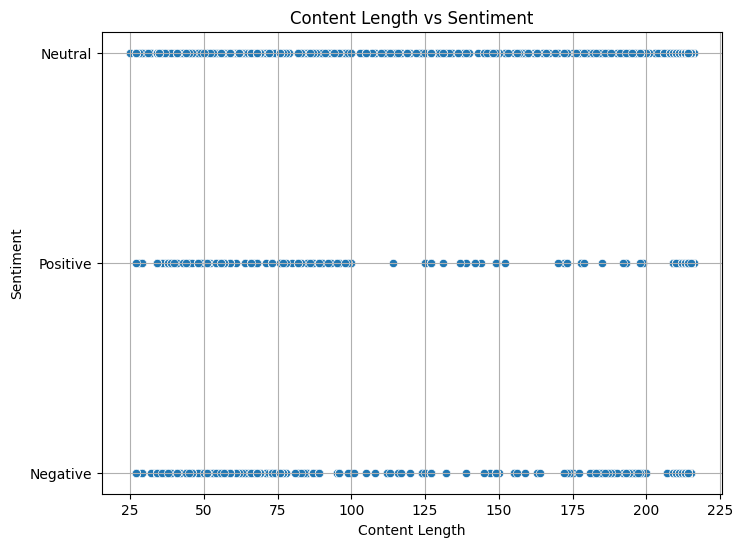

In [ ]:
# scatter plot of content length vs sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='content_length', y='title_sentiment')
plt.title('Content Length vs Sentiment')
plt.xlabel('Content Length')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()